# Support Vector Machine

In [1]:
df = read.csv("../Social_Network_Ads.csv")
df = df[3:5]

In [2]:
# divido el conjunto en entrenamiento y testing
library(caTools)
set.seed(123)
split = sample.split(df$Purchased, SplitRatio = 1/4)
trainSet = subset(df, split==FALSE) 
testSet = subset(df, split==TRUE) 

In [3]:
# dado que las variables tienen magnitudes muy diferentes (edades y sueldos), hay que escalarlas pa dejarlas en la misma escala
trainSet[1:2] = scale(trainSet[1:2])
testSet[1:2] = scale(testSet[1:2])

In [4]:
# ahora hacemos la clasificacion con los support vector machine
# usamos la misma libreria que se usó para hacer la regresion con svm
library(e1071)
clasificador = svm(formula = Purchased~.,
                    data = trainSet,
                    type = "C-classification",
                    kernel = "linear")

In [5]:
# predecimos los resultados
y_pred = predict(clasificador, newdata = testSet)

In [6]:
# creamos la matriz de confusion para ver que tan buena es nuestra clasificacion
y_test = testSet[, 3]
confMatrix = table(y_test, y_pred)
confMatrix

      y_pred
y_test  0  1
     0 58  6
     1 11 25

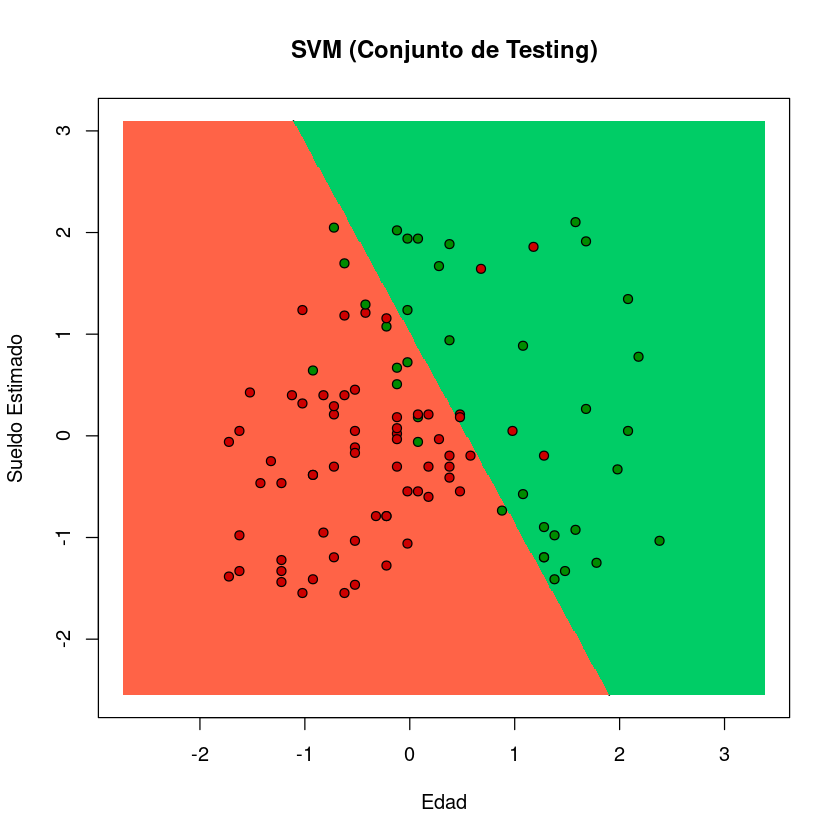

In [7]:
# nuevamente, no encontré una mejor forma de graficar esto en R asi que lo copio del curso ml a-z
# Visualización del conjunto de testing
set = testSet
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(clasificador, newdata=grid_set)
plot(set[, -3],
     main = 'SVM (Conjunto de Testing)',
     xlab = 'Edad', ylab = 'Sueldo Estimado',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

In [8]:
summary(clasificador)


Call:
svm(formula = Purchased ~ ., data = trainSet, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  113

 ( 56 57 )


Number of Classes:  2 

Levels: 
 0 1


